---------------------------------------------------

-- ESERCITAZIONE FINALE MODULO PYTHON --

-- ANALISI E DIFFUSIONE CASI COVID-19 NEL MONDO --

--------------------------------------------

In [376]:
## IMPORTAZIONE LIBRERIE

from sqlalchemy import create_engine
import dotenv
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [377]:
## LETTURA FILE CSV

percorso = 'owid-covid-data.csv'
c19 = pd.read_csv (percorso)

----------------------------

-- PRIMA CONSEGNA --

-- OPERAZIONI PER ESPLORARE CONTENUTO DEL DATASET-- 

In [378]:
c19.index

RangeIndex(start=0, stop=388920, step=1)

In [379]:
c19.shape

(388920, 67)

In [380]:
c19.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
38676,BTN,Asia,Bhutan,2020-05-09,7.0,0.0,0.000,NaN,0.0,0.000,...,NaN,79.807,1.700,71.78,0.654,7.824570e+05,NaN,NaN,NaN,NaN
303413,SAU,Asia,Saudi Arabia,2020-03-04,NaN,0.0,0.000,NaN,0.0,0.000,...,25.400,NaN,2.700,75.13,0.854,3.640882e+07,NaN,NaN,NaN,NaN
28839,BGD,Asia,Bangladesh,2022-12-25,2037024.0,96.0,13.714,29439.0,1.0,0.143,...,44.700,34.808,0.800,72.59,0.632,1.711864e+08,NaN,NaN,NaN,NaN
382992,OWID_WRL,NaN,World,2020-09-09,27150575.0,0.0,283578.000,967721.0,0.0,5714.286,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
73048,COG,Africa,Congo,2021-07-31,13156.0,0.0,15.143,177.0,0.0,0.143,...,52.300,47.964,NaN,64.57,0.574,5.970430e+06,NaN,NaN,NaN,NaN
98919,OWID_ENG,Europe,England,2020-11-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.655000e+07,NaN,NaN,NaN,NaN
73470,COG,Africa,Congo,2022-09-26,24916.0,0.0,3.143,386.0,0.0,0.000,...,52.300,47.964,NaN,64.57,0.574,5.970430e+06,NaN,NaN,NaN,NaN
136960,GLP,North America,Guadeloupe,2023-12-01,203235.0,0.0,0.000,1021.0,0.0,0.000,...,NaN,NaN,NaN,82.14,NaN,3.957620e+05,NaN,NaN,NaN,NaN
281461,QAT,Asia,Qatar,2023-05-11,509440.0,0.0,204.714,690.0,0.0,0.000,...,26.900,NaN,1.200,80.23,0.848,2.695131e+06,NaN,NaN,NaN,NaN
20304,AUS,Oceania,Australia,2020-09-16,26607.0,0.0,57.143,828.0,0.0,6.571,...,16.500,NaN,3.840,83.44,0.944,2.617741e+07,NaN,NaN,NaN,NaN


In [381]:
c19.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [382]:
c19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388920 entries, 0 to 388919
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388920 non-null  object 
 1   continent                                   370329 non-null  object 
 2   location                                    388920 non-null  object 
 3   date                                        388920 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         377060 non-null  float64
 

In [383]:
c19.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.500410e+05,3.779740e+05,3.767440e+05,3.277750e+05,378290.000000,377060.000000,350041.000000,377974.000000,376744.000000,327775.000000,...,223610.000000,147980.000000,266758.000000,358252.000000,292927.000000,3.889200e+05,1.318700e+04,13187.000000,13187.000000,13187.000000
mean,7.416469e+06,8.691576e+03,8.719559e+03,9.013788e+04,77.826382,78.072265,112814.104531,132.070821,132.497956,920.326030,...,32.910488,50.791666,3.097353,73.710973,0.722543,1.290204e+08,5.579910e+04,9.770265,10.979027,1777.206419
std,4.412071e+07,2.391682e+05,9.018375e+04,4.574260e+05,1421.325514,533.206099,160411.084685,1540.907612,570.307845,1132.928263,...,13.573135,31.954302,2.548236,7.395021,0.148996,6.625439e+08,1.559496e+05,12.022926,24.585788,1992.786873
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.501000e+03,0.000000e+00,0.000000e+00,1.370000e+02,0.000000,0.000000,2956.236000,0.000000,0.000000,65.785000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.781000e+02,2.080000,-1.490000,120.205410
50%,8.003600e+04,0.000000e+00,1.742900e+01,1.395000e+03,0.000000,0.143000,32595.574000,0.000000,4.240000,417.464000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.694300e+03,8.150000,5.660000,1248.656900
75%,8.609760e+05,0.000000e+00,4.005710e+02,1.260750e+04,0.000000,4.000000,155877.104000,0.000000,68.012000,1459.484000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.877775e+04,15.050000,15.690000,2878.521250
max,7.751321e+08,4.423623e+07,6.319461e+06,7.042222e+06,103719.000000,14817.000000,770693.756000,240325.866000,34332.267000,6485.570000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,377.830000,10293.515000


In [384]:
c19.continent.value_counts()

continent
Africa           87838
Europe           83910
Asia             76810
North America    63204
Oceania          36989
South America    21578
Name: count, dtype: int64

In [385]:
c19.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [386]:
## CREAZIONE LISTA CON TUTTI I CONTINENTI
lst_continent=[]
for i in c19.continent.unique():
    if i == i:
        lst_continent.append(i)
lst_continent

['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

----------------------------

-- SECONDA CONSEGNA--

-- NUMERO DI CASI TOTALI PER OGNI CONTINENTE --

In [387]:
print ('Casi totali di Covid-19 per ogni continente:')

continents=c19.groupby(['continent','location'])['total_cases'].max()
cases=continents.groupby('continent').sum()

cases

Casi totali di Covid-19 per ogni continente:


continent
Africa            13140148.0
Asia             301419618.0
Europe           252417184.0
North America    124530645.0
Oceania           14814237.0
South America     68842898.0
Name: total_cases, dtype: float64

In [388]:
##CREAZIONE DICT CON CHIAVE CONTINENTI E VALORI I CASI TOTALI PER CONTINENTE
tot_cases = {}

for i in lst_continent:
    tot_cases[i]=cases [i]

tot_cases

{'Asia': 301419618.0,
 'Europe': 252417184.0,
 'Africa': 13140148.0,
 'Oceania': 14814237.0,
 'North America': 124530645.0,
 'South America': 68842898.0}

---------------------------------

-- TERZA CONSEGNA --

-- DESCRITTORI STATICI PER CASI TOTALI TRA 2 CONTINENTI --

In [389]:
print('CONTINENTI PRESI IN ESAME:\n',lst_continent)
cont1=input('\nDIGITA UN CONTINENTE DA CONFRONTARE:\n')
cont2=input('DIGITA IL SECONDO CONTINENTE DA METTERE A CONFRONTO:\n')

print('\nCASI COVID TOTALI DEI CONTINENTI:')
print(cont1, tot_cases.get(cont1))
print(cont2, tot_cases.get(cont2))

print('\nMEDIA DEI CASI COVID TOTALI TRA I DUE CONTINENTI:')
casi_tot=tot_cases.get(cont1)+tot_cases.get(cont2)
print(casi_tot/2)

print('\nPERCENTUALE DEI CASI NEI CONTINENTI IN RELAZIONE AI CASI TOTALI:')
casi_max=sum(tot_cases.values())
print(cont1, round(((tot_cases.get(cont1)/casi_max)*100),2),'%')
print(cont2, round(((tot_cases.get(cont2)/casi_max)*100),2),'%')

CONTINENTI PRESI IN ESAME:
 ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']



DIGITA UN CONTINENTE DA CONFRONTARE:
 Africa
DIGITA IL SECONDO CONTINENTE DA METTERE A CONFRONTO:
 Europe



CASI COVID TOTALI DEI CONTINENTI:
Africa 13140148.0
Europe 252417184.0

MEDIA DEI CASI COVID TOTALI TRA I DUE CONTINENTI:
132778666.0

PERCENTUALE DEI CASI NEI CONTINENTI IN RELAZIONE AI CASI TOTALI:
Africa 1.7 %
Europe 32.56 %


In [390]:
##PERCENTUALE DI CASI PER CONTINENTE IN RELAZIONE AI CASI TOTALI
casi_max=sum(tot_cases.values())
print('PERCENTUALE DI CASI PER CONTINENTE IN RELAZIONE AI CASI TOTALI')

for i in lst_continent:
    print(i, round(((tot_cases.get(i)/casi_max)*100),2),'%')

PERCENTUALE DI CASI PER CONTINENTE IN RELAZIONE AI CASI TOTALI
Asia 38.88 %
Europe 32.56 %
Africa 1.7 %
Oceania 1.91 %
North America 16.07 %
South America 8.88 %


-------------------------------------------------

-- QUARTA CONSEGNA --

-- GRAFICI CON DATI PER ITALIA NELL'ANNO 2022 --

In [391]:
##CREAZIONE COLONNE FORMATO DATETIME
c19['giorno']=pd.to_datetime(c19.date)
c19.giorno
c19['years']=c19.giorno.dt.year
c19.years
c19['months']=c19.giorno.dt.month
c19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,giorno,years,months
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01-05,2020,1
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01-06,2020,1
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01-07,2020,1
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01-08,2020,1
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020-01-09,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388915,ZWE,Africa,Zimbabwe,2024-03-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024-03-20,2024,3
388916,ZWE,Africa,Zimbabwe,2024-03-21,266359.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024-03-21,2024,3
388917,ZWE,Africa,Zimbabwe,2024-03-22,266359.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024-03-22,2024,3
388918,ZWE,Africa,Zimbabwe,2024-03-23,266359.0,0.0,0.0,5740.0,0.0,0.0,...,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024-03-23,2024,3


In [392]:
##MASCHERA DEL DATAFRAME DA USARE PER I GRAFICI
mask=c19.location=='Italy'
mask2=c19.years==2022
graf=c19.loc[(mask)&(mask2)]
graf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,giorno,years,months
167077,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-01-01,2022,1
167078,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,83.51,0.892,59037472.0,168226.3,12.99,8.06,2849.4834,2022-01-02,2022,1
167079,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-01-03,2022,1
167080,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-01-04,2022,1
167081,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-01-05,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167437,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-12-27,2022,12
167438,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-12-28,2022,12
167439,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-12-29,2022,12
167440,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022-12-30,2022,12


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'ITALY, YEAR 2022'),
 Text(0.5, 0, 'MONTHS'),
 Text(0, 0.5, 'CASES X MILLION')]

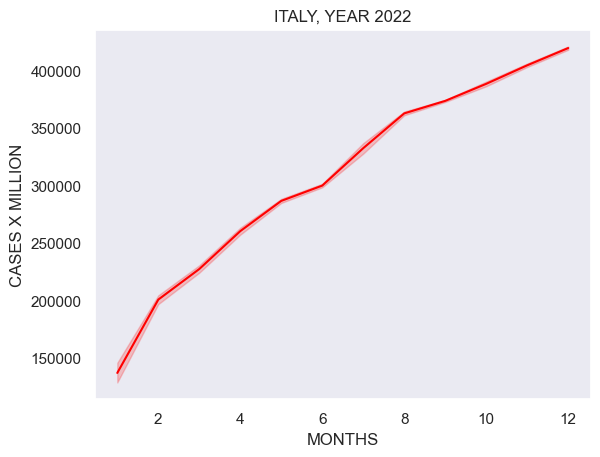

In [393]:
##GRAFICO RAFFIGURANTE ANDAMENTO DEI CASI TOTALI
sns.lineplot(data=graf, x='months', y='total_cases_per_million', color='red').set(title='ITALY, YEAR 2022', xlabel='MONTHS', ylabel='CASES X MILLION')
#?? Non sono riuscito a capire come modificare i numeri nell'asse Y

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'ITALY, YEAR 2022'),
 Text(0.5, 0, 'MONTHS'),
 Text(0, 0.5, 'CASES')]

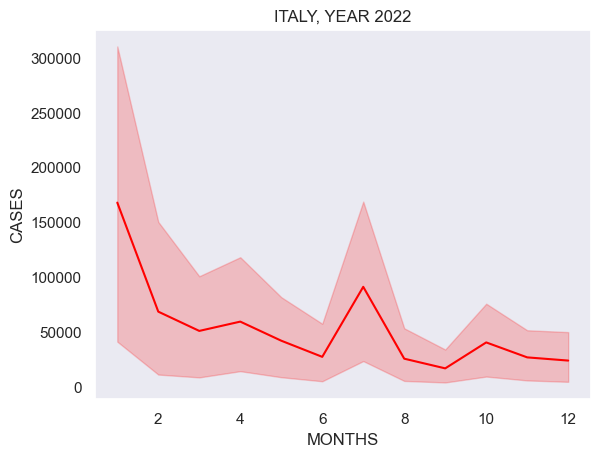

In [394]:
##GRAFICO RAFFIGURANTE ANDAMENTO DEI NUOVI CASI
sns.lineplot(data=graf, x='months', y='new_cases', color='red').set(title='ITALY, YEAR 2022', xlabel='MONTHS', ylabel='CASES')
## PLUS markerfacecolor='black', markersize=10, marker='.'
#?? Non sono riuscito a capire il perchè di queste aree in rosso chiaro oltre la linea

In [395]:
##CREAZIONE COLONNA FITTIZIA CONTENENTE NUOVI CASI IN MANIERA CUMULATIVA
cases_incr=[]
x=0
for i in graf.new_cases:
    x+=i
    cases_incr.append(x)
graf['cases_incr']=cases_incr

C:\Users\Franc\AppData\Local\Temp\ipykernel_47184\3097354816.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graf['cases_incr']=cases_incr


RUNNANDO LA CELLA SOPRA, COMPARE QUESTO AVVISO, AVVERTE DEL FATTO CHE STO CREANDO UNA COLONNA SU UNA PORZIONE DEL DF ORIGINALE
C:\Users\Franc\AppData\Local\Temp\ipykernel_47184\924058918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graf['cases_incr']=cases_incr

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'ITALY, YEAR 2022'),
 Text(0.5, 0, 'MONTHS'),
 Text(0, 0.5, 'CASES')]

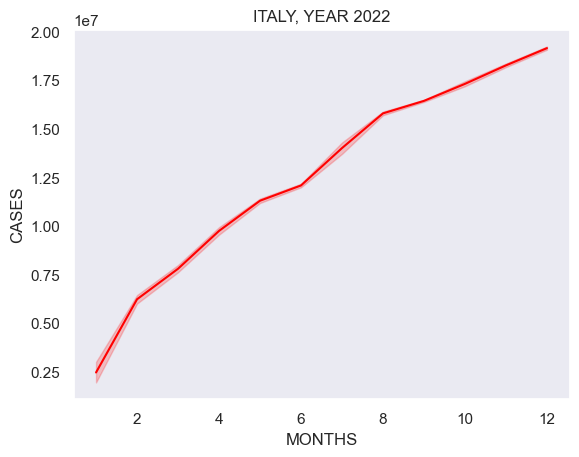

In [396]:
##GRAFICO RAFFIGURANTE ANDAMENTO DEI NUOVI CASI IN MANIERA CUMULATIVA
sns.lineplot (data=graf, x='months', y='cases_incr', color='red').set(title='ITALY, YEAR 2022', xlabel='MONTHS', ylabel='CASES')

---------------------------------------------

-- QUINTA CONSEGNA --

-- GRAFICI ITALIA, GERMANIA E FRANCIA RIGUARDANTE IL NUMERO DI PAZIENTI IN TERAPIA INTENSIVA --

In [397]:
##MASCHERA DEL DATAFRAME DA USARE PER I GRAFICI
mask=c19.location.isin(['Italy','Germany','France'])
mask2=c19.giorno.between("2022-05-01", "2023-04-30")
graf2=c19.loc[(mask)&(mask2)]
graf2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,giorno,years,months
117878,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,82.66,0.901,67813000.0,89517.72,6.19,6.24,1385.1523,2022-05-01,2022,5
117879,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2022-05-02,2022,5
117880,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2022-05-03,2022,5
117881,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2022-05-04,2022,5
117882,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2022-05-05,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167557,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2023-04-26,2023,4
167558,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2023-04-27,2023,4
167559,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2023-04-28,2023,4
167560,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2023-04-29,2023,4


In [398]:
graf2.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

[Text(0.5, 1.0, 'ICU X NATIONS'),
 Text(0.5, 0, 'YEARS'),
 Text(0, 0.5, 'VALUES')]

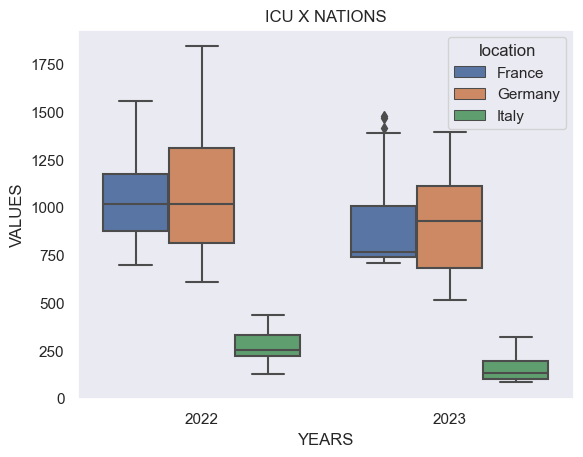

In [399]:
##GRAFICO RAFFIGURANTE IL CONFRONTO DEGLI ICU TRA LE NAZIONI
sns.boxplot(data=graf2, x='years', y='icu_patients', hue='location').set(title='ICU X NATIONS', xlabel='YEARS', ylabel='VALUES')
#?? La mia idea era di avere un asse X più pulito e in linea con la richiesta, es (2022-05,2022-06 ecc...)

-----------------------------------------------------

-- SESTA CONSEGNA --

-- GRAFICI ITALIA, FRANCIA, GERMANIA E SPAGNA RIGUARDANTE LA SOMMA PAZIENTI OSPITALIZZATI --

In [400]:
##MASCHERA DEL DATAFRAME DA USARE PER I GRAFICI
mask=c19.location.isin(['Italy','Germany','France', 'Spain'])
mask2=c19.years==2023
graf3=c19.loc[(mask)&(mask2)]
graf3

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,giorno,years,months
118123,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,82.66,0.901,67813000.0,122180.83,6.64,25.88,1886.7708,2023-01-01,2023,1
118124,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023-01-02,2023,1
118125,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023-01-03,2023,1
118126,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023-01-04,2023,1
118127,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023-01-05,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329226,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023-12-27,2023,12
329227,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023-12-28,2023,12
329228,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023-12-29,2023,12
329229,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023-12-30,2023,12


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


[Text(0.5, 1.0, 'HOSP PATIENTS 2023'),
 Text(0.5, 0, 'NATIONS'),
 Text(0, 0.5, 'VALUES')]

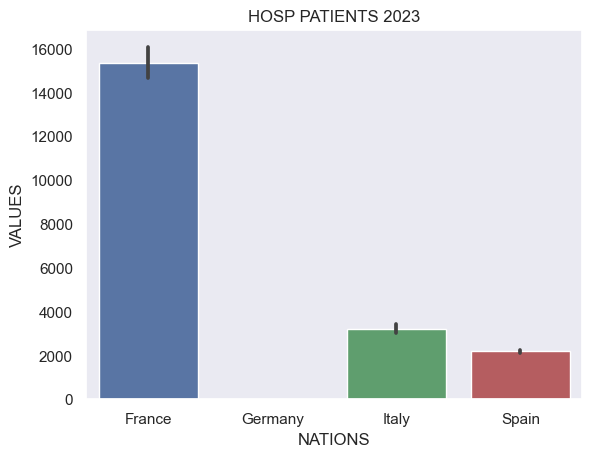

In [401]:
##GRAFICO RAFFIGURANTE SOMMA DEI PAZIENTI OSPITALIZZATI PER LE VARIE NAZIONI
sns.barplot (data=graf3, x='location', y='hosp_patients').set(title='HOSP PATIENTS 2023', xlabel='NATIONS', ylabel='VALUES')